Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None
  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537
Error: Required columns not found in dataset!

Linear Regression Results:
MSE: 0.0000
RMSE: 0.0000
R2 Score: 1.0000

Ridge Regression Results:
M

<ipython-input-6-d4a85b386155>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="viridis")


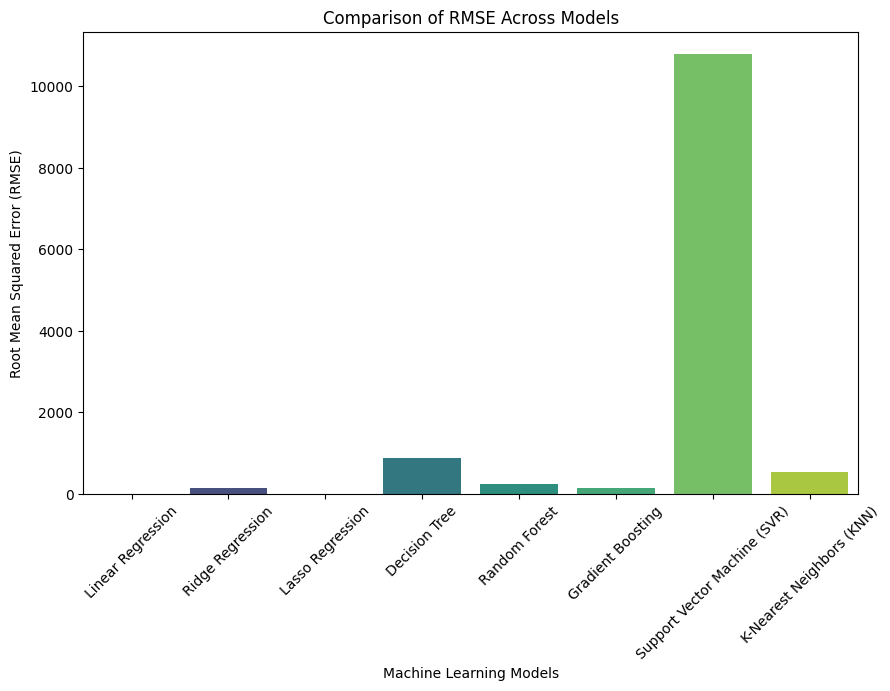

In [6]:
# Install necessary libraries (if not already installed)
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset (Replace with correct path in Google Colab)
file_path = "Uber-Jan-Feb-FOIL.csv"
df = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Overview:")
print(df.info())
print(df.head())

# ----------------- DATA PREPROCESSING ----------------- #
# Handling missing values
df.dropna(inplace=True)

# Convert datetime column if present
if 'Date/Time' in df.columns:
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df['Hour'] = df['Date/Time'].dt.hour
    df['Day'] = df['Date/Time'].dt.day
    df['Month'] = df['Date/Time'].dt.month

# Encode categorical variables (if any)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
if 'Pickup_latitude' in df.columns and 'Pickup_longitude' in df.columns:
    X = df[['Pickup_latitude', 'Pickup_longitude', 'Hour', 'Day', 'Month']]
    y = df['Pickup_longitude']  # Example target variable (Change as needed)
else:
    print("Error: Required columns not found in dataset!")
    X = df.drop(columns=['date'])
    y = df.iloc[:, -1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------------- MACHINE LEARNING MODELS ----------------- #
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# ----------------- PLOT RESULTS ----------------- #
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Comparison of RMSE Across Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Machine Learning Models")
plt.show()
